In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

In [2]:
# Generate a two dimensional stimulus (e.g two pixels) with correlations and 100 samples (e.g. points in time)
# First pixel data
nsamp = 100
x1 = np.random.randn(1, nsamp)

# Second pixel that is correlated with the first
x2 = .4 * x1 + .6 * np.random.randn(1, nsamp)

# Concatinate into a stimulus matrix
x = np.vstack([x1, x2])

## Generate a filter and the corresponding one dimensional response 
# Set weights on each channel
h = np.array([5, 7]).reshape([2, 1])

# Make response of system
y = np.dot(x.T, h)

In [6]:
## set up a range of potential values for each weight (you are solving 
# the equation and are looking for possible correct answers)
h1, h2 = np.meshgrid(np.arange(-1, 10, .2), np.arange(-1, 10, .2))
hs = np.vstack([h1.ravel(), h2.ravel()])

# get responses from each set of weights
ys = np.dot(x.T, hs)

# calculate error between the response, y, and each of the possible responses, ys.  
err = np.sum((y - ys) ** 2, 0)

# reshape for plotting
err = err.reshape(h1.shape)

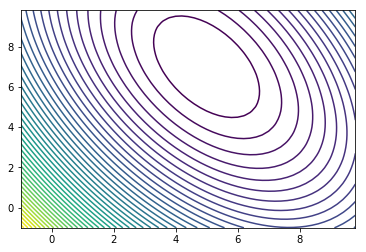

In [7]:
## plot contour of error surface. Note the shape of the surface is angled
# because the two variable are correlated.
fig, ax = plt.subplots()
ax.contour(h1, h2, err, 50)

# Problem 1.
 Plot the actual solution as a large cross on the contour plot
 What is the value of the error surface at this solution?

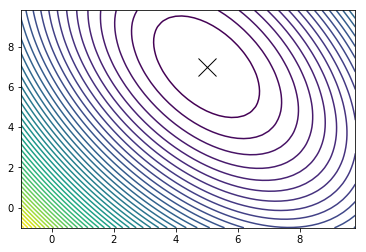

In [8]:
fig, ax = plt.subplots()
ax.contour(h1, h2, err, 50)
ax.plot(h[0], h[1], 'kx', ms=18)

# Problem 2. 
 Generate a new response yr (for y real) that includes noise (SNR ~1). 
 Repeat some of the code above to obtain
 a new error surface as you would with real data.  Plot
 this on figure 2 and compare to figure 1. Calculate the minimum of this
 error and compare to the minimum of the noise free error surface.
 What happens to the error surface if you only have 10 data points (and noise)? 
 Calculate that one and plot in on a third plot.

In [9]:
# The new response:
SNR = 1
yr = y + (np.std(y) / np.sqrt(SNR)) * np.random.randn(1, nsamp).T

# calculate error between the response and each of the possible responses  
err_real = np.sum((yr - ys) ** 2, 0)

# reshape for plotting
err_real = err_real.reshape(h1.shape)

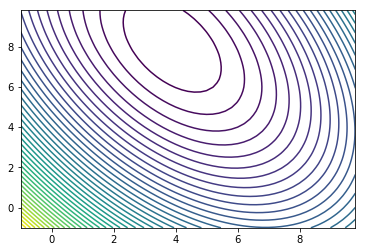

In [10]:
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real, 50)

In [11]:
# With fewer data points 
nsampsmall = 10
xsmall = x[:, :nsampsmall]
yrsmall = yr[:nsampsmall, :]

# calculate error between the response and each of the possible responses  
err_real_small = np.sum((yrsmall - ys[:nsampsmall, :]) ** 2, 0)

# reshape for plotting
err_real_small = err_real_small.reshape(h1.shape)

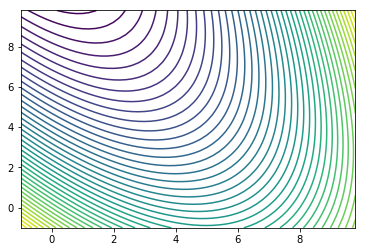

In [12]:
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real_small, 50)

We notice that the error surfaces do not become noisy but that the minimum moves either
when we add noise or when we reduce the number of points.
The minimum value in the noisys situation is also a postive - non-zero number.

# Problem 3.
Solve for the Least MSE solution using the analytical solution (calculate the cross and auto correlation and take ratio).
You migh also check out what the \ does in matlab with the raw x and y vectors.
Plot this solution as well as the correct solutions on your contour plots of figures 2 and 3.  

In [13]:
cross_xy = np.dot(x, yr) / nsamp
auto_xx = np.dot(x, x.T) / nsamp
hpred = np.dot(np.linalg.inv(auto_xx), cross_xy)

In [14]:
# You can check that hpred = hpred_matlab.  THis works because the
# mldivide() (same as \) command in matlab solves the system of equation by LMSE.
# I recommend more explicitly writing down the computations.

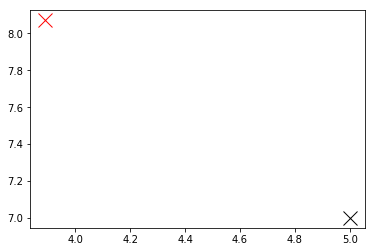

In [15]:
# plot solution on contour
fig, ax = plt.subplots()
ax.plot(hpred[0], hpred[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black

In [16]:
# Repeat for the subset
cross_xy_small = np.dot(xsmall, yrsmall) / nsampsmall
auto_xx_small = np.dot(xsmall, xsmall.T) / nsampsmall
hpred_small = np.dot(np.linalg.inv(auto_xx_small), cross_xy_small)  # Shoulnd't this be xy


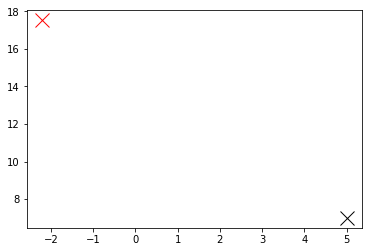

In [17]:
# plot solution on contour
fig, ax = plt.subplots()
ax.plot(hpred_small[0], hpred_small[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black

# Problem 4. Now we're going to solve using gradient descent to show that you get the same answer as the MSE
You are going to solve it using the x and yr data. Use the
analytical solution for the gradient.  Fill in the missing code and
print out the final solution. Stop the descent when error is less than
the noise power.

In [18]:
# set a step size and a fixed number of maximum steps
nsteps = 1000
vary = np.var(yr)
hscale = 10    # This is a guess on the variance of the h parameters
stepsize = hscale / vary # This is to get stepsizes with the correct units.

In [36]:
# initialize hhat at origin and allocate space
hhat = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhat during our descent

# loop for a certain number of iterations
# and mark when your reach the noise level...
totstep = -1
for ii in range(nsteps):
    
    # calculate the gradient at hhat
    preds = np.dot(x.T, hhat[:,ii])
    err = preds - yr.squeeze()
    grad = np.dot(x, err) / nsamp
    
    # update hhat using stepsize and gradient
    hhat[:, ii + 1] = hhat[:, ii] - stepsize * grad
    
    # calculate error
    err = np.mean((np.dot(x.T, hhat[:, ii+1]) - yr) ** 2)
    
    # set stopping condition when error is below noise power.
    if err < (vary / (SNR + 1)):
        if totstep == -1:
            totstep = ii + 1
    

if totstep == -1:
    totstep = ii + 1

msg = 'Gradient solution of h = [{:.2f}, {:.2f}] reached after {} steps\n'.format(hhat[0, totstep], hhat[1, totstep], totstep)
print(msg)


Gradient solution of h = [3.89, 8.07] reached after 1000 steps



# Problem 5.  Plot descent path on contour of figure 2.
Comment on why early stopping could give you a more general solution.  

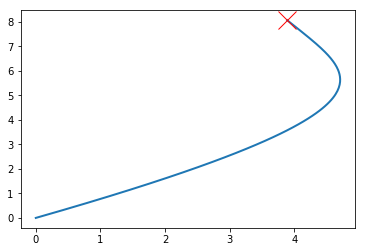

In [42]:
fig, ax = plt.subplots()
ax.plot(hhat[0, :totstep], hhat[1, :totstep], lw=2)
ax.plot(hhat[0, totstep], hhat[1, totstep], 'rx', ms=18)

# Problem 6.

Repeat the calculations of Problem 4 and 5 with figure 3. 

In [43]:
# initialize hhatsmall at origin and allocate space
hhatsmall = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhatsmall during our descent

# loop for a certain number of iterations
# and mark when your reach the noise level...
totstep = -1
for ii in range(nsteps):
    
    # calculate the gradient at hhatsmall
    preds = np.dot(xsmall.T, hhatsmall[:,ii])
    err = preds - yrsmall.squeeze()
    grad = np.dot(xsmall, err) / nsamp
    
    # update hhatsmall using stepsize and gradient
    hhatsmall[:, ii + 1] = hhatsmall[:, ii] - stepsize * grad
    
    # calculate error
    err = np.mean((np.dot(xsmall.T, hhatsmall[:, ii+1]) - yrsmall) ** 2)
    
    # set stopping condition when error is below noise power.
    if err < (vary / (SNR + 1)):
        if totstep == -1:
            totstep = ii + 1
    

if totstep == -1:
    totstep = ii + 1

msg = 'Gradient solution of h = [{:.2f}, {:.2f}] reached after {} steps\n'.format(hhatsmall[0, totstep], hhatsmall[1, totstep], totstep)
print(msg)

Gradient solution of h = [0.51, 11.52] reached after 1000 steps



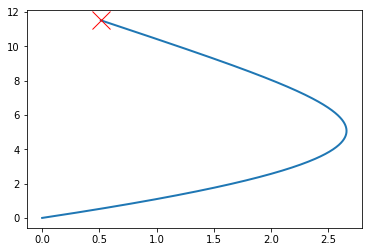

In [44]:
fig, ax = plt.subplots()
ax.plot(hhatsmall[0, :totstep], hhatsmall[1, :totstep], lw=2)
ax.plot(hhatsmall[0, totstep], hhatsmall[1, totstep], 'rx', ms=18)

# Problem 6. Solve using coordinate descent
 Fill the code to solve the problem using coordinate descend and plot the 
 trajectories on figure 2 and figure 3 the path with a different
 color line.

In [59]:
nsteps = 1000

# initialize hhat at origin and allocate space
hhatcd = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhat during our descent

# loop for a certain number of iterations
# and mark when your reach the noise level...
totstep = -1
for ii in range(nsteps):
    
    # calculate the gradient at hhat
    preds = np.dot(x.T, hhatcd[:,ii])
    err = preds - yr.squeeze()
    grad = np.dot(x, err) / nsamp
    
    # update hhat using stepsize and gradient
    ix_maxgrad = np.argmax(np.abs(grad))
    maxgrad = grad[ix_maxgrad]
    hhatcd[ix_maxgrad, ii + 1] = hhatcd[ix_maxgrad, ii] - stepsize * maxgrad
    
    # calculate error
    err = np.mean((np.dot(x.T, hhatcd[:, ii+1]) - yr) ** 2)
    
    # set stopping condition when error is below noise power.
    if err < (vary / (SNR + 1)):
        if totstep == -1:
            totstep = ii + 1
    

if totstep == -1:
    totstep = ii + 1

msg = 'Coordinate descent solution of h = [{:.2f}, {:.2f}] reached after {} steps\n'.format(
    hhatcd[0, totstep], hhatcd[1, totstep], totstep)
print(msg)


Coordinate descent solution of h = [0.00, 0.26] reached after 1000 steps



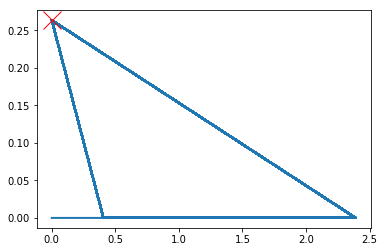

In [60]:
fig, ax = plt.subplots()
ax.plot(hhatcd[0, :totstep], hhatcd[1, :totstep], lw=2)
ax.plot(hhatcd[0, totstep], hhatcd[1, totstep], 'rx', ms=18)

In [62]:
# Repeat for the smaller data shown in figure 3. 
nsteps = 1000

# initialize hhat at origin and allocate space
hhatcdsmall = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhat during our descent

# loop for a certain number of iterations
# and mark when your reach the noise level...
totstep = -1
for ii in range(nsteps):
    
    # calculate the gradient at hhat
    preds = np.dot(xsmall.T, hhatcdsmall[:,ii])
    err = preds - yrsmall.squeeze()
    grad = np.dot(xsmall, err) / nsamp
    
    # update hhat using stepsize and gradient
    ix_maxgrad = np.argmax(np.abs(grad))
    maxgrad = grad[ix_maxgrad]
    hhatcdsmall[ix_maxgrad, ii + 1] = hhatcdsmall[ix_maxgrad, ii] - stepsize * maxgrad
    
    # calculate error
    err = np.mean((np.dot(xsmall.T, hhatcdsmall[:, ii+1]) - yrsmall) ** 2)
    
    # set stopping condition when error is below noise power.
    if err < (vary / (SNR + 1)):
        if totstep == -1:
            totstep = ii + 1
    

if totstep == -1:
    totstep = ii + 1

msg = 'Coordinate descent solution of hsmall = [{:.2f}, {:.2f}] reached after {} steps\n'.format(
    hhatcdsmall[0, totstep], hhatcdsmall[1, totstep], totstep)
print(msg)


Coordinate descent solution of hsmall = [0.00, 13.06] reached after 1000 steps



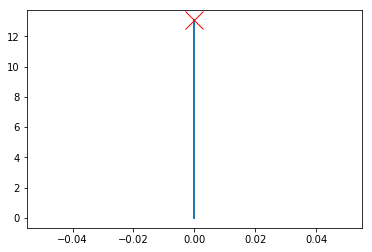

In [63]:
fig, ax = plt.subplots()
ax.plot(hhatcdsmall[0, :totstep], hhatcdsmall[1, :totstep], lw=2)
ax.plot(hhatcdsmall[0, totstep], hhatcdsmall[1, totstep], 'rx', ms=18)

# Problem 7.  Show on figures 2 and 3, the path corresponds to ridge regression.
 Remember that you calculated the auto and cross correlation in problem 3.

In [103]:
# The auto and cross correlation were obtained in Problem 3 with
# cross_xy = np.dot(x, yr) / nsamp
# auto_xx = np.dot(x, x.T) / nsamp
# Eigenvalue decomposition of auto_xx using the svd
u, s, v = np.linalg.svd(auto_xx)

# hyper parameter lambda as fraction of largest eigenvalue
alphas = [10, 1, 0.5, 0.1, 0.05, 0.01, .005, .001, .0005, .0001, .00001, 0]
nalpha = len(alphas)

maxs = np.max(s)
hr = np.zeros([2, nalpha])

totstepridge = -1
for ii in range(nalpha):
    # Calcuate inverse for each ridge parameter
    XXinv = np.dot(v.T, np.dot(np.diag(1. / (s + (maxs * alphas[ii]))), u))
    
    # Estimate parameters for each ridge value
    hr[:, ii] = np.dot(XXinv, cross_xy).squeeze()
    
    # calculate error
    err = np.mean( (np.dot(x.T, hr[:, ii]) - yr) ** 2)
    
    # set stopping criteria
    if err < (vary / (SNR + 1)):
        if totstepridge == -1:
            totstepridge = ii

            
    if totstepridge == -1:
        totstepridge = ii

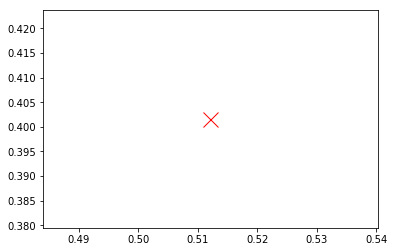

In [88]:
# plot ridge path on contour
fig, ax = plt.subplots()
ax.plot(hr[0, :totstepridge], hr[1, :totstepridge], 'g', lw=2)
ax.plot(hr[0, totstepridge], hr[1, totstepridge], 'rx', ms=15)

In [89]:
# The auto and cross correlation were obtained in Problem 3 with
# cross_xy = np.dot(x, yr) / nsamp
# auto_xx = np.dot(x, x.T) / nsamp
# Eigenvalue decomposition of auto_xx using the svd
u, s, v = np.linalg.svd(auto_xx_small)

# hyper parameter lambda as fraction of largest eigenvalue
alphas = [10, 1, 0.5, 0.1, 0.05, 0.01, .005, .001, .0005, .0001, .00001, 0]
nalpha = len(alphas)

maxs = np.max(s)
hrsmall = np.zeros([2, nalpha])

totstepridge = -1
for ii in range(nalpha):
    # Calcuate inverse for each ridge parameter
    XXinv = np.dot(v.T, np.dot(np.diag(1. / (s + (maxs * alphas[ii]))), u))
    
    # Estimate parameters for each ridge value
    hrsmall[:, ii] = np.dot(XXinv, cross_xy).squeeze()
    
    # calculate error
    err = np.mean( (np.dot(xsmall.T, hrsmall[:, ii]) - yrsmall) ** 2)
    
    # set stopping criteria
    if err < np.var(yrsmall) / (SNR + 1):
        if totstepridge == -1:
            totstepridge = ii

            
    if totstepridge == -1:
        totstepridge = ii

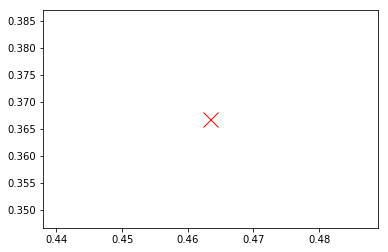

In [83]:
# plot ridge path on contour
fig, ax = plt.subplots()
ax.plot(hrsmall[0, :totstepridge], hrsmall[1, :totstepridge], 'g', lw=2)
ax.plot(hrsmall[0, totstepridge], hrsmall[1, totstepridge], 'rx', ms=15)